In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

import warnings
warnings.filterwarnings('ignore')

In [301]:
df_white = pd.read_csv("data/wine/winequality-white.csv", delimiter=";")
# df_red = pd.read_csv("data/wine/winequality-red.csv", delimiter=";")
# df = pd.concat([df_white, df_red], axis=0)

df = df_white

In [302]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [303]:
for col in df.columns:
    print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [304]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [306]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [307]:
df.shape

(4898, 12)

In [308]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

# Exploratory Data Analysis

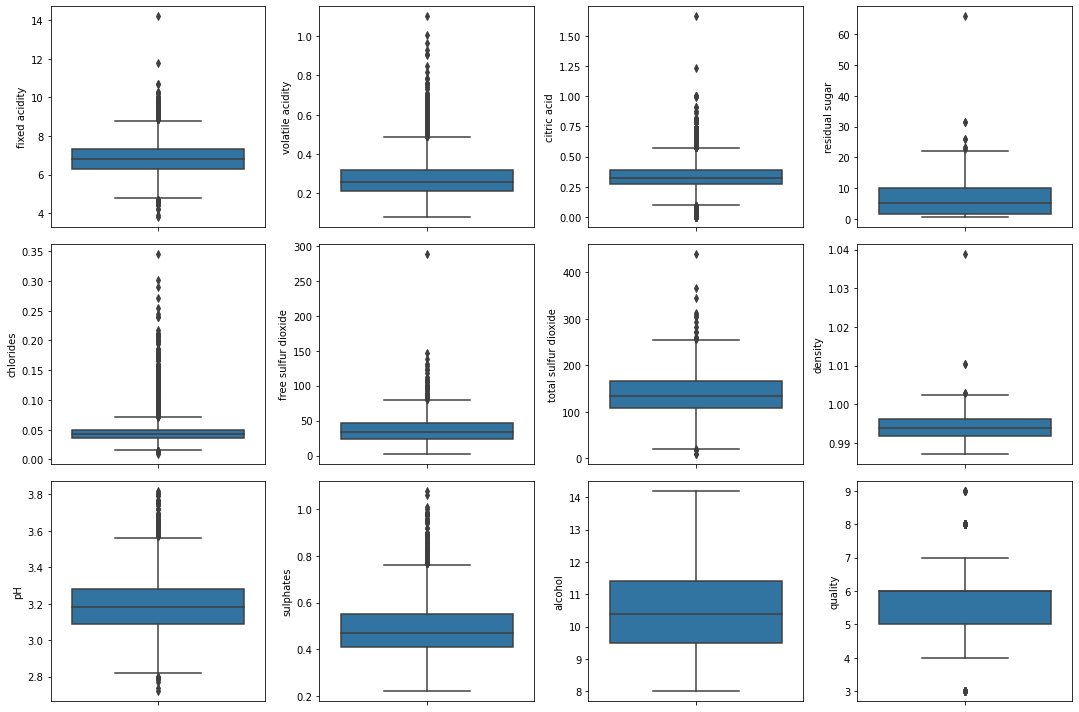

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(15,10))
axes = axes.flatten()
index=0

for col, val in df.items():
    sns.boxplot(y=col, data=df, ax=axes[index])
    index += 1

plt.tight_layout()

In [11]:
# We see some outliers for 'residual sugar', 'free sulfur dioxide' and 'density'
# We can remove these to improve accuracy

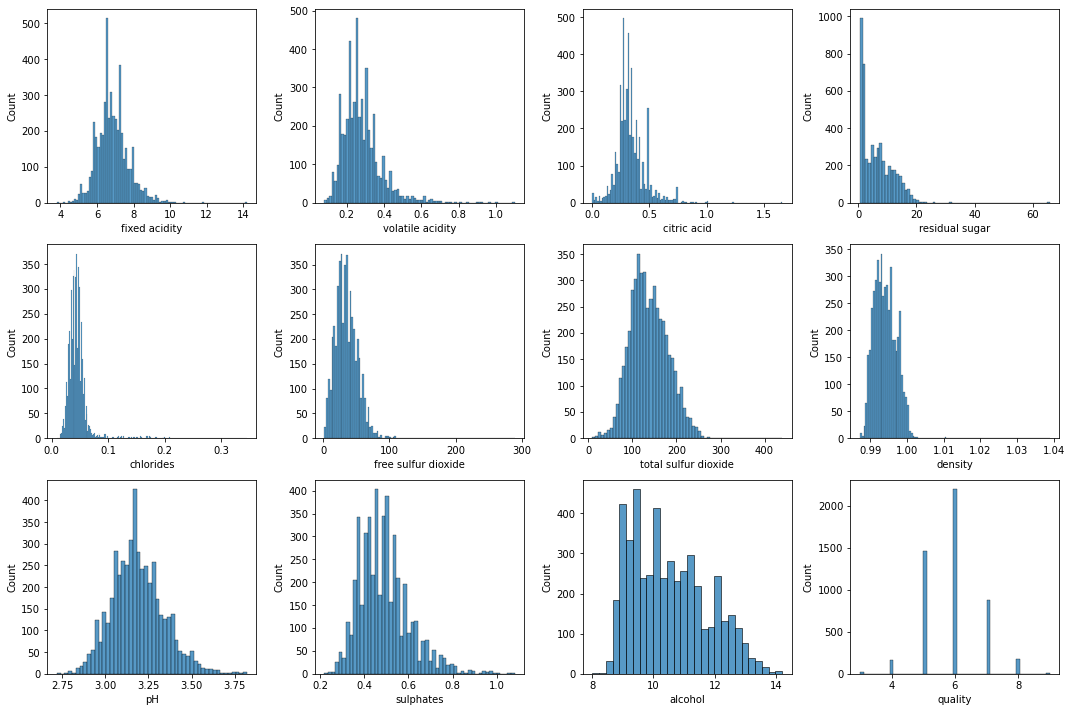

In [12]:
fig, axes = plt.subplots(3, 4, figsize=(15,10))
axes = axes.flatten()
index=0

for col, val in df.items():
    sns.histplot(data=val, ax=axes[index])
    index += 1

plt.tight_layout()

### Log transformation

In [309]:
# Some data is right-skewed
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

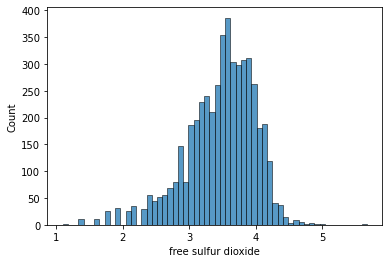

In [310]:
sns.histplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='count'>

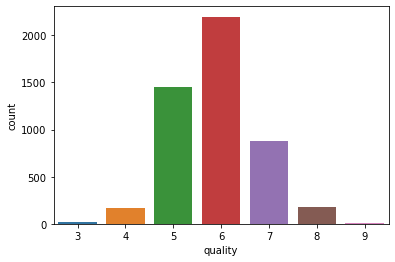

In [311]:
sns.countplot(x=df['quality'])

In [312]:
# there is a class imbalacement
# lets map quality to low, mid, high (Only 3 classes for this experiement)

quality_map = {3:0, 4:0, 5:0, 6:1, 7:2, 8:2, 9:2}
df['quality'] = df['quality'].map(quality_map)

<AxesSubplot:xlabel='quality', ylabel='count'>

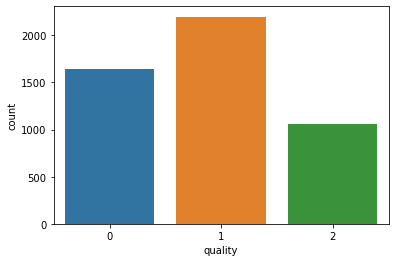

In [313]:
sns.countplot(x=df['quality'])

# Correlation matrix

<AxesSubplot:>

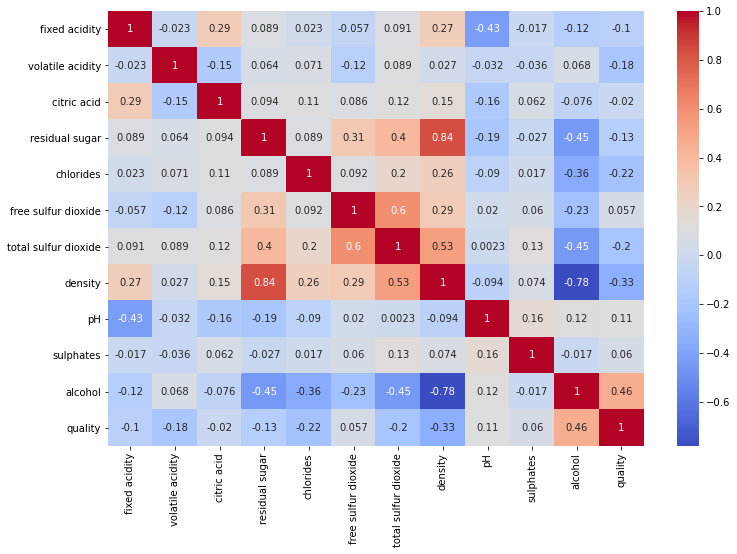

In [314]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [315]:
# Check how much each attrubute correlates with wine quality
abs(corr['quality']).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.463165
density                 0.332495
chlorides               0.221316
total sulfur dioxide    0.201185
volatile acidity        0.182924
residual sugar          0.125506
pH                      0.106422
fixed acidity           0.103154
sulphates               0.060027
free sulfur dioxide     0.056759
citric acid             0.020301
Name: quality, dtype: float64

# Import sklearn

In [316]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# from imblearn.over_sampling import SMOTE

In [317]:
sklearn.__version__

'0.23.2'

### Split data

In [318]:
x = df.drop(columns=['quality'])
y = df['quality']


In [319]:
y.value_counts()

1    2198
0    1640
2    1060
Name: quality, dtype: int64

###  Class imbalancement

In [320]:
# over_sample = SMOTE()
# # transform dataset

# x, y = over_sample.fit_resample(x, y)

In [321]:
# y.value_counts()

In [322]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

In [323]:
print(f"train set size: {x_train.shape}")
print(f"test set size: {x_test.shape}")

train set size: (3918, 11)
test set size: (980, 11)


### Scale

In [324]:
# create scaler
scaler = StandardScaler()

In [325]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)
y_train_sc = y_train
y_test_sc = y_test

In [326]:
print(np.min(x_train_sc))
print(np.max(x_train_sc))

-4.001579313076342
14.874305039838294


In [327]:
mm_scaler = MinMaxScaler()

In [328]:
x_train_mm = mm_scaler.fit_transform(x_train)
x_test_mm = mm_scaler.fit_transform(x_test)

In [329]:
print(np.min(x_train_mm))
print(np.max(x_train_mm))

0.0
1.0000000000000002


# Helper Methods

In [330]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=10,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       scoring="balanced_accuracy",
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [331]:
def plot_model_curve(estimator, title, X, y, param_name, param_range, cv=10, n_jobs=None, x_scale_is_log=False):
    """
    https://scikit-learn.org/0.15/auto_examples/plot_validation_curve.html
    """
    
    train_scores, test_scores = validation_curve(
        estimator, 
        X, 
        y, 
        param_name=param_name, 
        param_range=param_range,
        cv=cv, 
        scoring="balanced_accuracy", 
        n_jobs=n_jobs
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    
    if x_scale_is_log:
        plt.xscale('log')

    plt.plot(param_range, train_scores_mean, label="Training score", color="r")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")

    plt.legend(loc="best")

    return plt
    

In [332]:
def plot_model_curve_boost_base(title, X, y, base_dt_param_name, base_dt_param_range, dt_params, ada_params, cv=10, n_jobs=None):
    """
    https://scikit-learn.org/0.15/auto_examples/plot_validation_curve.html
    """
    
    train_scores = []
    test_scores = []
    
    for bdp in base_dt_param_range:
        dt_params[base_dt_param_name] = bdp
        dt_clf = DecisionTreeClassifier(**dt_params)
        
        ada_params['base_estimator'] = dt_clf
        ada_clf = AdaBoostClassifier(**ada_params)

    
        test_score = cross_val_score(
            estimator=ada_clf,
            X=X,
            y=y,
            scoring="balanced_accuracy",
            cv=cv
        )
        
        ada_clf.fit(X, y)
        train_score = ada_clf.score(X, y)
    
        train_scores.append(train_score)
        test_scores.append(test_score.mean())

    plt.title(title)
    plt.xlabel(base_dt_param_name)
    plt.ylabel("Score")

    plt.plot(base_dt_param_range, train_scores, label="Training score", color="r")
    plt.plot(base_dt_param_range, test_scores, label="Cross-validation score", color="g")

    plt.legend(loc="best")

    return plt

# Decision Tree

In [333]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Coasrse grid search

In [77]:
param_grid = [
    {
        'max_depth': range(10, 40),
        'ccp_alpha': [0.001, 0.01, 0.1],
    }
]

dt_clf = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(dt_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'ccp_alpha': 0.001, 'max_depth': 15}

### Learning Curve Analysis

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

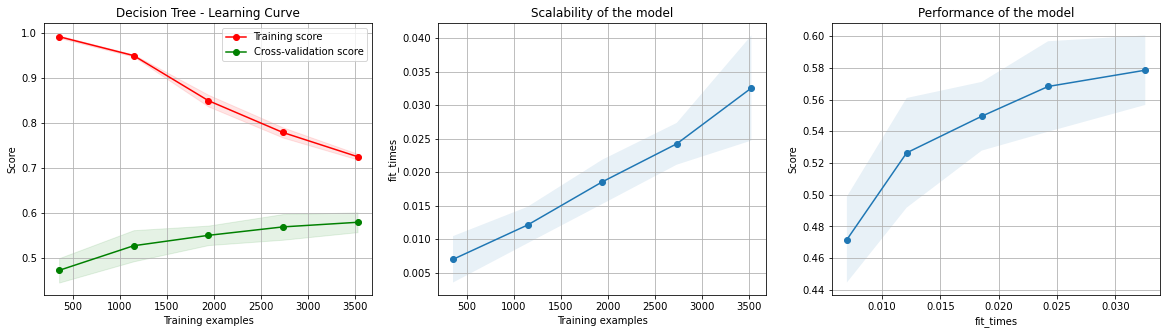

In [39]:
dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.001, max_depth=15)

plot_learning_curve(
    estimator=dt_clf, 
    title="Decision Tree - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

- Big gap between curves. Meaning model is overfitting trainig data
- High variance

### Model Complexity Analysis

This is a hight variance model. What we can do
- Adding more training instances
- Increase the regularization (Model cant overfit -> low varience)
- Reducing the numbers of features

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

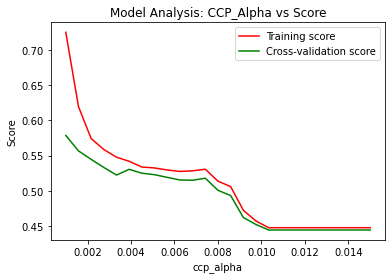

In [88]:
param_range = np.linspace(0.001, 0.015, 25)

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=15)

plot_model_curve(
    estimator=dt_clf,
    title="Model Analysis: CCP_Alpha vs Score",
    X=x_train,
    y=y_train,
    param_name="ccp_alpha",
    param_range=param_range,
    cv=10
)

### Lets do max_depth

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

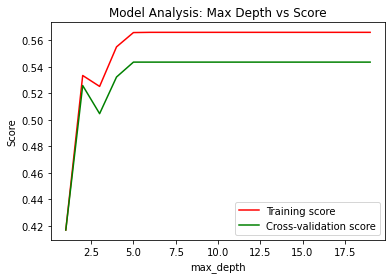

In [89]:
param_range = [i for i in range(0, 20)]
dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0025)

plot_model_curve(
    estimator=dt_clf,
    title="Model Analysis: Max Depth vs Score",
    X=x_train,
    y=y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=10
)

- around max_depth=5 we see good trainig and cross-val scores
- Now lets pick different ccp_alpha for this max_depth fixed

- lets pick ccp_alpha=0.0021

### Final Decision Tree Model

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

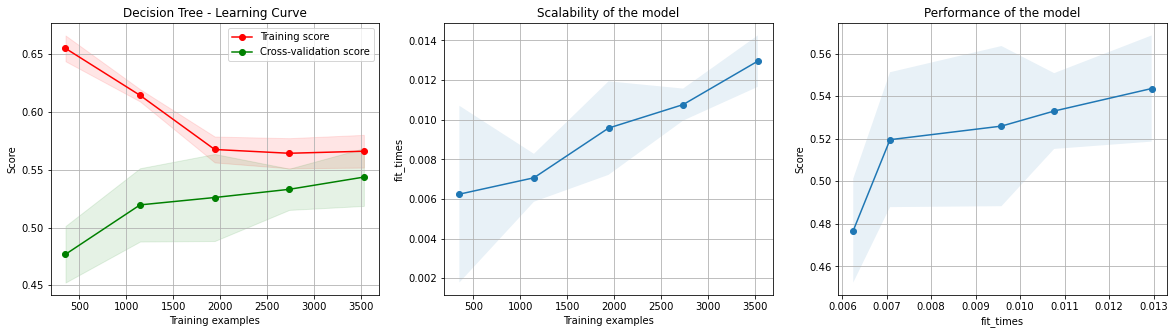

In [334]:
final_dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0025, max_depth=5)

plot_learning_curve(
    estimator=final_dt_clf, 
    title="Decision Tree - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

- Training score dropped (e.i: Model is not overfitting as much as before) Means we reduced variance
- Interesting findings:
 - fit time dropped from 0.03s to 0.013s. This is likely due to reducing max_depth
 - Also overall performance (on cross val) dropped ~2% after regularization

### Test Accuracy

In [337]:
final_dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0025, max_depth=5)
final_dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0025, max_depth=5, random_state=0)

In [339]:
dt_y_preds = final_dt_clf.predict(x_test)

In [342]:
accuracy_score(y_test, dt_y_preds)

0.5622448979591836

# Neural Network

In [359]:
from sklearn.neural_network import MLPClassifier

### Coarse Grid Search

In [45]:
param_grid = [
    {
        'hidden_layer_sizes': [(5,), (10,), (25), (5, 5), (10, 10), (25, 25)],
        'activation': ['logistic', 'relu'],
        'alpha': [0.001, 0.01, 0.1]
    }
]

mlp_clf = MLPClassifier(random_state=0)

grid_search = GridSearchCV(mlp_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (25, 25)}

In [46]:
# param_grid = [
#     {
#         'hidden_layer_sizes': [(5,), (10,), (25), (5, 5), (10, 10), (25, 25)],
#         'activation': ['relu'],
#         'alpha': [0.001, 0.01, 0.1]
#     }
# ]

# mlp_clf = MLPClassifier(random_state=0)

# grid_search = GridSearchCV(mlp_clf, param_grid, cv=10, return_train_score=True)

# grid_search.fit(x_train, y_train)

# grid_search.best_params_

In [47]:
param_grid = [
    {
        'hidden_layer_sizes': [(5,), (10,), (25), (5, 5), (10, 10)],
        'activation': ['relu'],
        'solver': ['sgd'],
        'momentum': [0.1, 0.5, 1],
        'alpha': [0.001, 0.01, 0.1]
    }
]

mlp_clf = MLPClassifier(random_state=0)

grid_search = GridSearchCV(mlp_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (10,),
 'momentum': 0.5,
 'solver': 'sgd'}

In [48]:
def nn_per_epoch(X, y, activation, alpha, momentum, solver, hidden_layer_size, max_epoches):
    epochs = []
    train_scores = []
    val_scores = []
    
#     _X_train, _X_val, _y_train, _y_val = train_test_split(X, y, test_size=0.4)

    for epoch in range(10, max_epoches+1, 20):
        mlp_clf = MLPClassifier(
            hidden_layer_sizes=hidden_layer_size,
            activation=activation, 
            alpha=alpha, 
#             momentum=momentum,
#             solver=solver,
            max_iter=epoch,
            random_state=0
        )
        
        val_score = cross_val_score(
            estimator=mlp_clf,
            X=X,
            y=y,
            scoring="accuracy",
            cv=10
        )
        val_score = val_score.mean()
        
        mlp_clf.fit(X, y)
        train_score = mlp_clf.score(X, y)
        
        val_scores.append(val_score)
        train_scores.append(train_score)
        
        epochs.append(epoch)
        
#         train_score = mlp_clf.score(_X_train, _y_train)
#         val_score = mlp_clf.score(_X_val, _y_val)
        
#         train_scores.append(train_score)
#         val_scores.append(val_score)
               
#         print("epoch:", epoch, " trian_score:", train_score, " val_score:", val_score)
    
    plt.title("Neural Net Learning Curve\nHidden Layers="+str(hidden_layer_size))
    plt.xlabel("epochs")
    plt.ylabel("Score")

    plt.plot(epochs, train_scores, label="Training score", color="r")
    plt.plot(epochs, val_scores, label="Cross-validation score", color="g")


    plt.legend(loc="best")
    plt.show()


## NN Architecture Selection

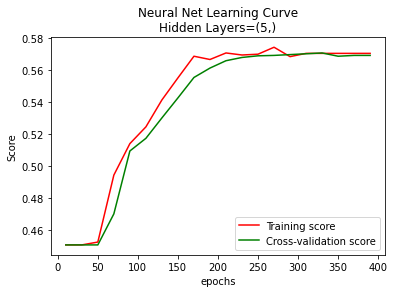

In [40]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='logistic',
    alpha=0.01,
    hidden_layer_size=(5,),
    momentum=0.9,
    solver='adam',
    max_epoches=400
)

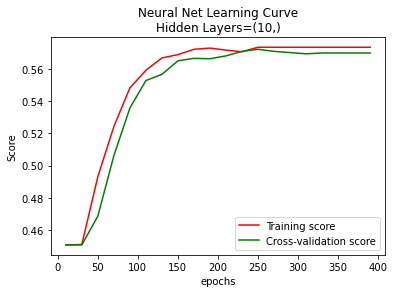

In [49]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='logistic',
    alpha=0.01,
    hidden_layer_size=(10,),
    momentum=0.9,
    solver='adam',
    max_epoches=400
)

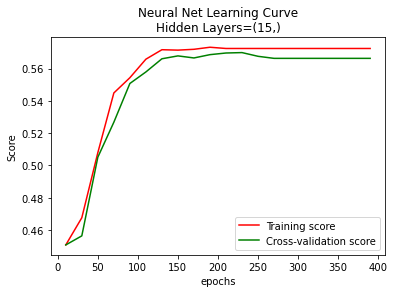

In [50]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='logistic',
    alpha=0.01,
    hidden_layer_size=(15,),
    momentum=0.9,
    solver='adam',
    max_epoches=400
)

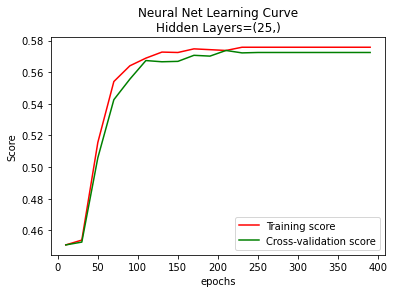

In [51]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='logistic',
    alpha=0.01,
    hidden_layer_size=(25,),
    momentum=0.9,
    solver='adam',
    max_epoches=400
)

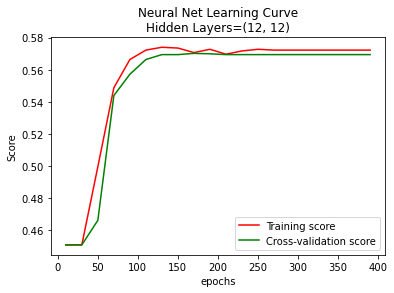

In [52]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='logistic',
    alpha=0.01,
    hidden_layer_size=(12, 12),
    momentum=0.9,
    solver='adam',
    max_epoches=400
)

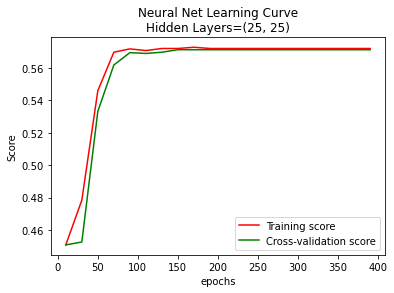

In [53]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='logistic',
    alpha=0.01,
    hidden_layer_size=(25, 25),
    momentum=0.9,
    solver='adam',
    max_epoches=400
)

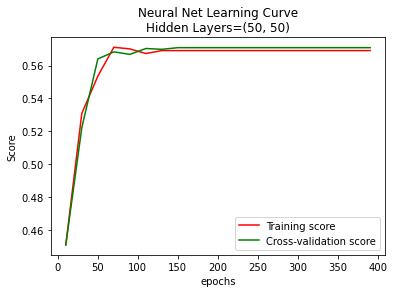

In [54]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='logistic',
    alpha=0.01,
    hidden_layer_size=(50, 50),
    momentum=0.9,
    solver='adam',
    max_epoches=400
)

## Do model analysis


In [363]:
# param_range = np.linspace(0, 0.05, 10)

# param_range = [0, 0.1, 0.2, 0.3, 0.5, 0.01, 0.02, 0.03, 0.05, 0.001, 0.002, 0.003, 0.005,]

# param_range = np.logspace(0.001, 0.1, num=20)

# nn_clf = MLPClassifier(
#     hidden_layer_sizes=(25,),
#     activation='logistic',
#     solver='adam',
#     max_iter=200,
#     random_state=0
# )

# plot_model_curve(
#     estimator=nn_clf,
#     title="Model Analysis: alpha vs Score",
#     X=x_train,
#     y=y_train,
#     param_name="alpha",
#     param_range=param_range,
#     cv=10
# )


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

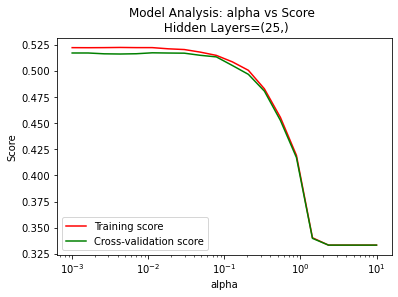

In [362]:
param_range = np.logspace(-3, 1, 20)

nn_clf = MLPClassifier(
    hidden_layer_sizes=(25,),
    activation='logistic',
    solver='adam',
    max_iter=150,
    random_state=0
)

plot_model_curve(
    estimator=nn_clf,
    title="Model Analysis: alpha vs Score \n Hidden Layers=(25,)",
    X=x_train_mm,
    y=y_train,
    param_name="alpha",
    param_range=param_range,
    cv=10,
    x_scale_is_log=True
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

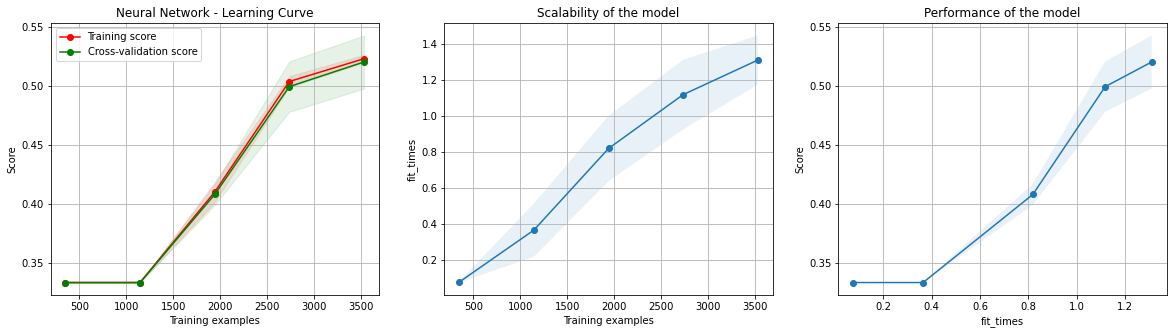

In [66]:
nn_clf = MLPClassifier(
    activation='logistic',
    alpha=0.01,
    hidden_layer_sizes=(12, 12),
    momentum=0.9,
    solver='adam',
    max_iter=100,
    random_state=0
)

plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train_mm, 
    y=y_train,
    cv=10
)


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

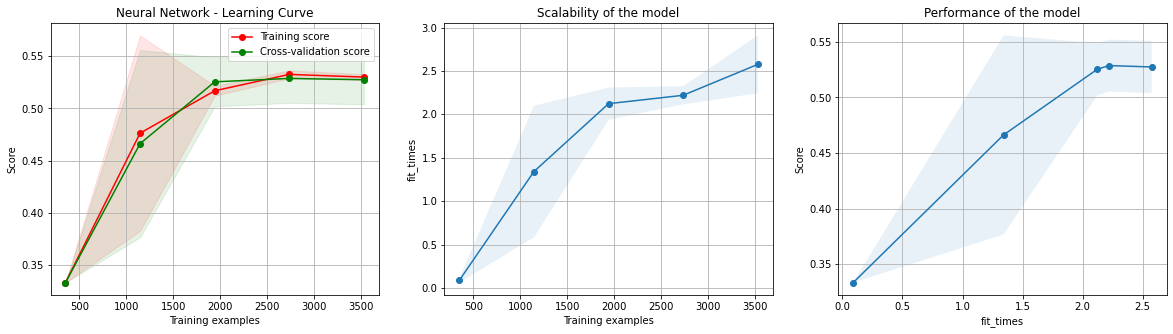

In [67]:
nn_clf = MLPClassifier(
    activation='logistic',
    alpha=0.01,
    hidden_layer_sizes=(12, 12),
    momentum=0.9,
    solver='adam',
    max_iter=500,
    random_state=0
)

plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train_mm, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

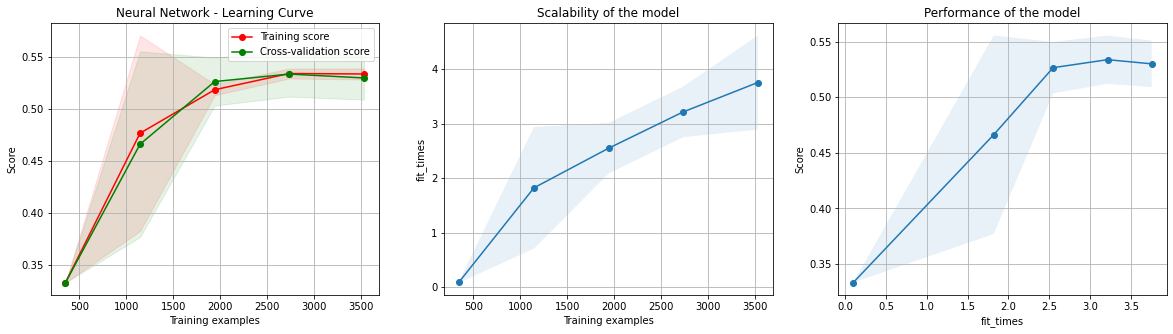

In [70]:
nn_clf = MLPClassifier(
    activation='logistic',
    alpha=0.0001,
    hidden_layer_sizes=(12, 12),
    momentum=0.9,
    solver='adam',
    max_iter=500,
    random_state=0
)

plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train_mm, 
    y=y_train,
    cv=10
)

In [91]:
from sklearn.base import clone

def get_nn_learning_curve(estimator, X, y, step):
    
    sample_size = []
    train_scores = []
    val_scores = []
    
    for i in range(100, X.shape[0]+1, step):
        estimator_clone = clone(estimator)
        
        x_block = x_train_mm[:i]
        y_block = y_train[:i]
        
        estimator_clone.fit(x_block, y_block)
        train_score = estimator_clone.score(x_block, y_block)

        val_score = cross_val_score(
            estimator=estimator_clone,
            X=x_block,
            y=y_block,
            scoring="balanced_accuracy",
            cv=10
        )
        
        val_score = val_score.mean()
                
        sample_size.append(i)
        train_scores.append(train_score)
        val_scores.append(val_score)

    plt.title("Neural Net Learning Curve")
    plt.xlabel("Sample Size")
    plt.ylabel("Score")

    plt.plot(sample_size, train_scores, label="Training score", color="r")
    plt.plot(sample_size, val_scores, label="Cross-validation score", color="g")

    plt.legend(loc="best")
    plt.show()


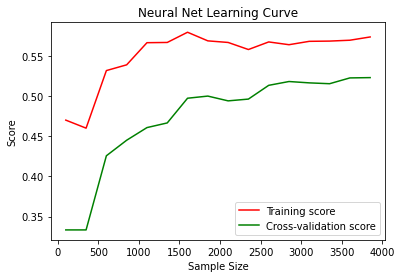

In [92]:
nn_clf = MLPClassifier(
    activation='logistic',
    alpha=0.02,
    hidden_layer_sizes=(6),
    momentum=0.9,
    solver='adam',
    max_iter=450,
    random_state=0
)

get_nn_learning_curve(
    estimator=nn_clf,
    X=x_train_mm,
    y=y_train,
    step=250
)

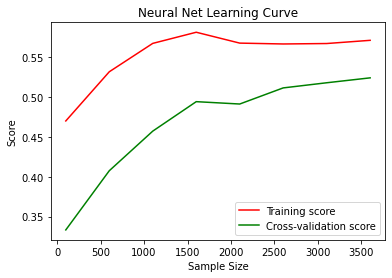

In [93]:
nn_clf = MLPClassifier(
    activation='logistic',
    alpha=0.03,
    hidden_layer_sizes=(6),
    momentum=0.9,
    solver='adam',
    max_iter=450,
    random_state=0
)

get_nn_learning_curve(
    estimator=nn_clf,
    X=x_train_mm,
    y=y_train,
    step=500
)

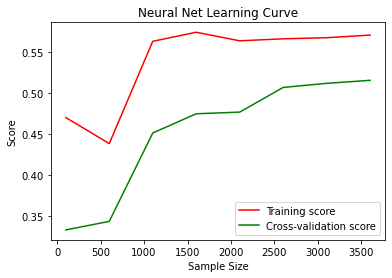

In [94]:
nn_clf = MLPClassifier(
    activation='logistic',
    alpha=0.1,
    hidden_layer_sizes=(6),
    momentum=0.9,
    solver='adam',
    max_iter=450,
    random_state=0
)

get_nn_learning_curve(
    estimator=nn_clf,
    X=x_train_mm,
    y=y_train,
    step=500
)

In [ ]:
nn_clf = MLPClassifier(
    activation='logistic',
    alpha=0.1,
    hidden_layer_sizes=(25,),
    solver='adam',
    max_iter=200,
    random_state=0
)

get_nn_learning_curve(
    estimator=nn_clf,
    X=x_train_mm,
    y=y_train,
    step=500
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

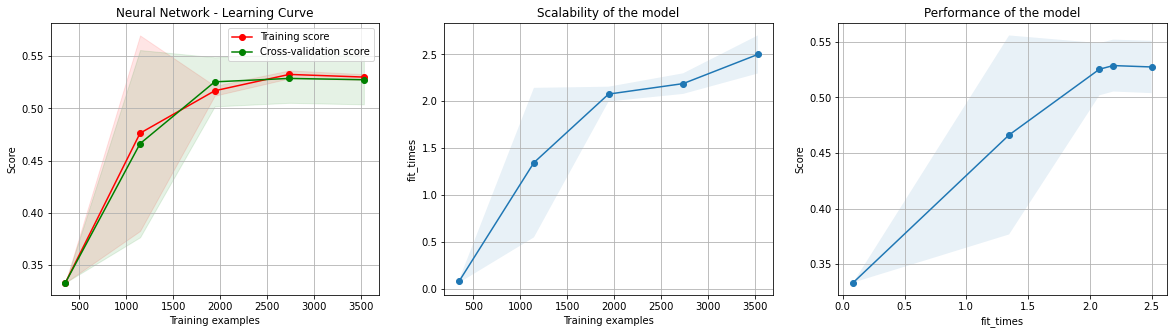

In [68]:
nn_clf = MLPClassifier(
    activation='logistic',
    alpha=0.01,
    hidden_layer_sizes=(12, 12),
    momentum=0.9,
    solver='adam',
    max_iter=1000,
    random_state=0
)

plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train_mm, 
    y=y_train,
    cv=10
)

## Model Selection for different solver
{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (10,),
 'momentum': 0.5,
 'solver': 'sgd'}



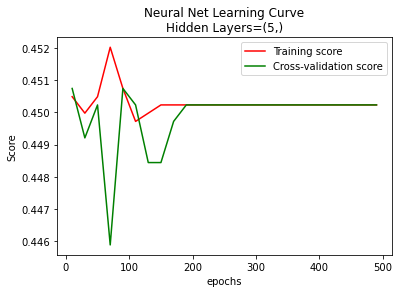

In [57]:
nn_per_epoch(
    X=x_train, 
    y=y_train, 
    activation='relu',
    alpha=0.001,
    momentum=0.5,
    solver='sgd',
    hidden_layer_size=(5,),
    max_epoches=500
)

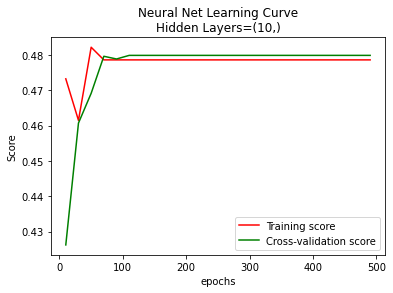

In [58]:
nn_per_epoch(
    X=x_train, 
    y=y_train, 
    activation='relu',
    alpha=0.001,
    momentum=0.5,
    solver='sgd',
    hidden_layer_size=(10,),
    max_epoches=500
)

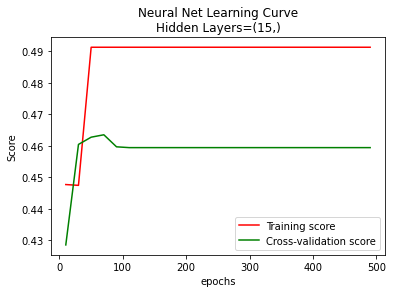

In [59]:
nn_per_epoch(
    X=x_train, 
    y=y_train, 
    activation='relu',
    alpha=0.001,
    momentum=0.5,
    solver='sgd',
    hidden_layer_size=(15,),
    max_epoches=500
)

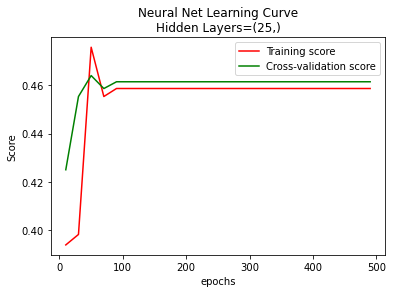

In [60]:
nn_per_epoch(
    X=x_train, 
    y=y_train, 
    activation='relu',
    alpha=0.001,
    momentum=0.5,
    solver='sgd',
    hidden_layer_size=(25,),
    max_epoches=500
)

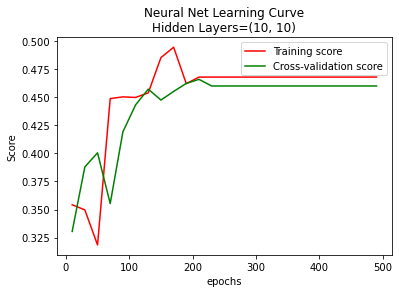

In [61]:
nn_per_epoch(
    X=x_train, 
    y=y_train, 
    activation='relu',
    alpha=0.001,
    momentum=0.5,
    solver='sgd',
    hidden_layer_size=(10, 10),
    max_epoches=500
)

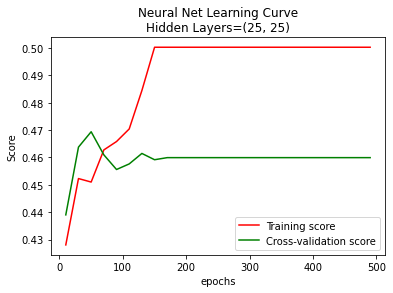

In [62]:
nn_per_epoch(
    X=x_train, 
    y=y_train, 
    activation='relu',
    alpha=0.001,
    momentum=0.5,
    solver='sgd',
    hidden_layer_size=(25, 25),
    max_epoches=500
)

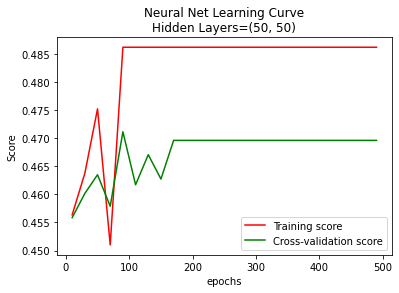

In [63]:
nn_per_epoch(
    X=x_train, 
    y=y_train, 
    activation='relu',
    alpha=0.001,
    momentum=0.5,
    solver='sgd',
    hidden_layer_size=(50, 50),
    max_epoches=500
)

- pick (10, 10) for SGD

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

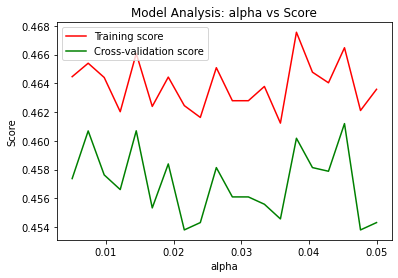

In [64]:
param_range = np.linspace(0.005, 0.05, 20)

nn_clf = MLPClassifier(
    hidden_layer_sizes=(10,10),
    activation='relu',
    momentum=0.5,
    solver='sgd',
    max_iter=300,
    random_state=0
)

plot_model_curve(
    estimator=nn_clf,
    title="Model Analysis: alpha vs Score",
    X=x_train,
    y=y_train,
    param_name="alpha",
    param_range=param_range,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

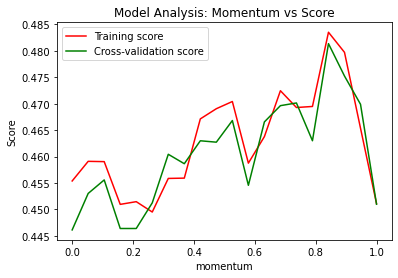

In [67]:
param_range = np.linspace(0, 1, 20)

nn_clf = MLPClassifier(
    hidden_layer_sizes=(10,10),
    activation='relu',
    alpha=0.038,
    solver='sgd',
    max_iter=300,
    random_state=0
)

plot_model_curve(
    estimator=nn_clf,
    title="Model Analysis: Momentum vs Score",
    X=x_train,
    y=y_train,
    param_name="momentum",
    param_range=param_range,
    cv=10
)

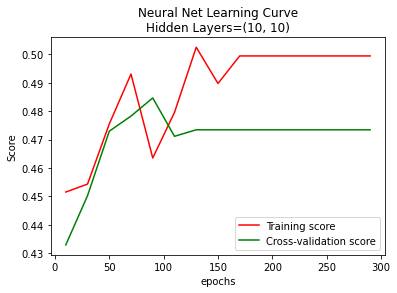

In [85]:
# nn_per_epoch(
#     X=x_train, 
#     y=y_train, 
#     activation='relu',
#     alpha=0.038,
#     momentum=0.9,
#     solver='sgd',
#     hidden_layer_size=(10, 10),
#     max_epoches=300,
# )


### Final NN Model

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

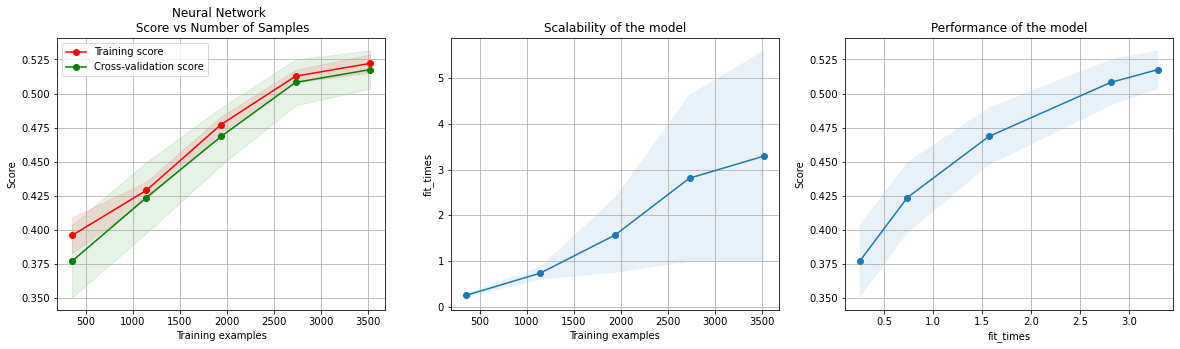

In [365]:
nn_clf = MLPClassifier(
    hidden_layer_sizes=(25,),
    activation='logistic', 
    alpha=0.03, 
    max_iter=150,
    random_state=0
)
plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network \n Score vs Number of Samples", 
    X=x_train, 
    y=y_train,
    cv=10
)

### Test Accuracy

In [366]:
final_nn_clf = MLPClassifier(
    hidden_layer_sizes=(25,),
    activation='logistic', 
    alpha=0.03, 
    max_iter=150,
    random_state=0
)
final_nn_clf.fit(x_train, y_train)

dt_y_preds = final_nn_clf.predict(x_test)

accuracy_score(y_test, dt_y_preds)

0.5653061224489796

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

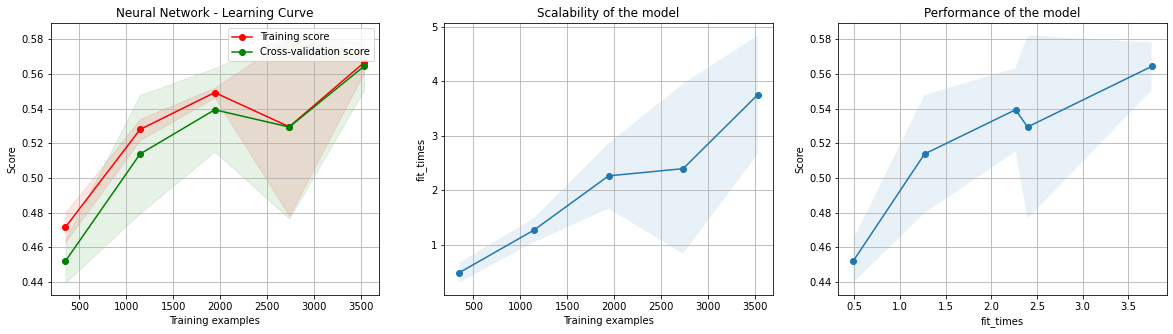

In [44]:
nn_clf = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='logistic', 
    alpha=0.01, 
    max_iter=300,
    random_state=0
)
plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

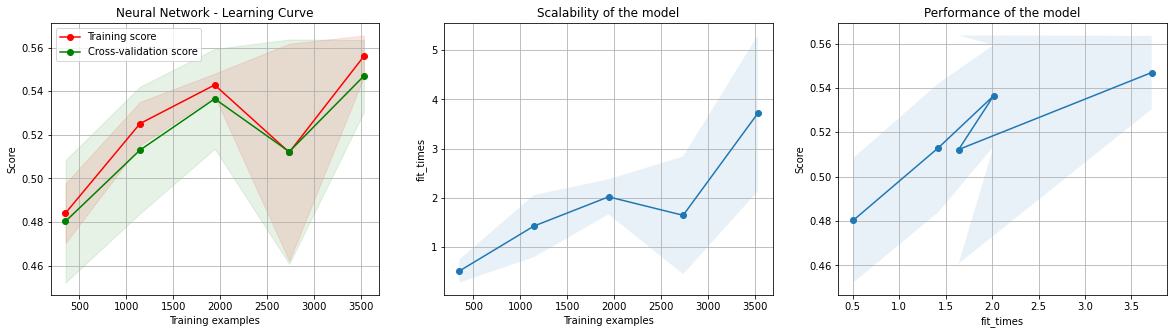

In [69]:
nn_clf = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='logistic', 
    alpha=0.095, 
    max_iter=300,
    random_state=0
)
plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

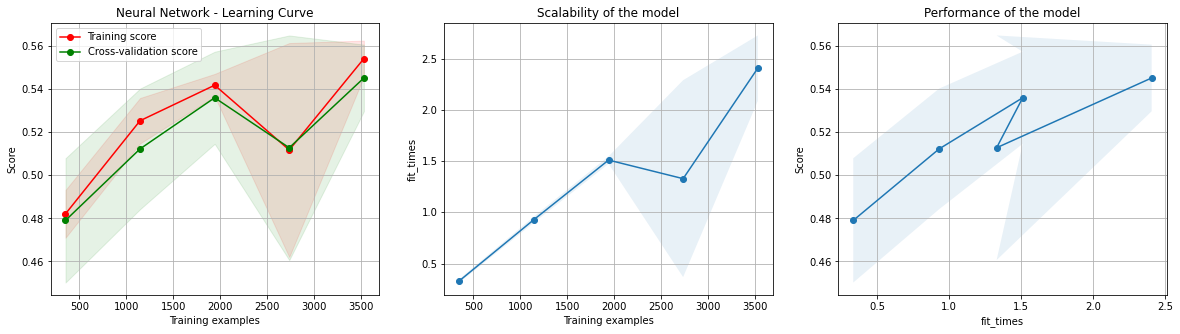

In [71]:
nn_clf = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='logistic', 
    alpha=0.09, 
    max_iter=300,
    random_state=0
)
plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

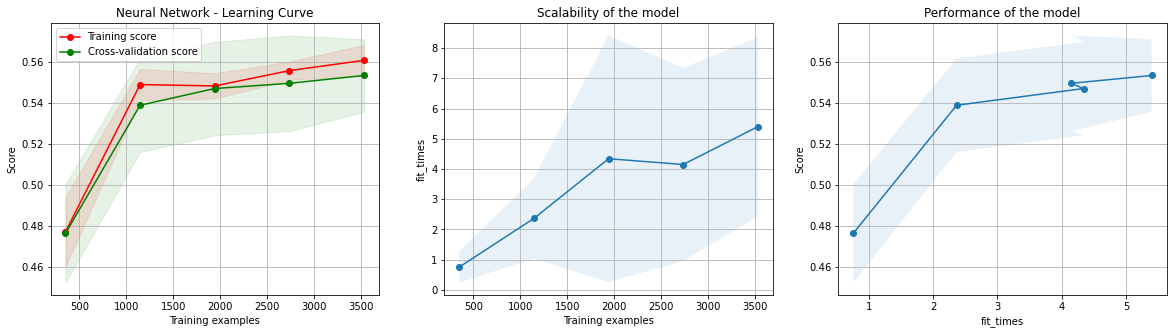

In [76]:
nn_clf = MLPClassifier(
    hidden_layer_sizes=(25, 10),
    activation='logistic', 
    alpha=0.09, 
    max_iter=300,
    random_state=0
)
plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

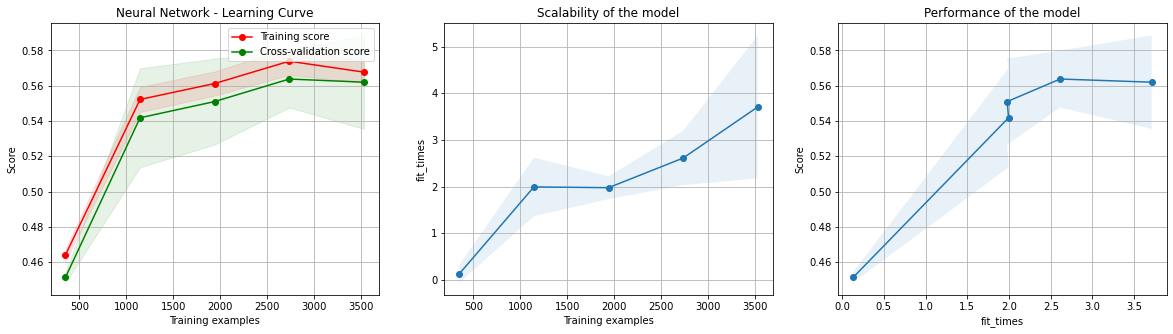

In [81]:
nn_clf = MLPClassifier(
    hidden_layer_sizes=(25, 25),
    activation='logistic', 
#     alpha=0.0005, 
    max_iter=300,
    random_state=0
)
plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

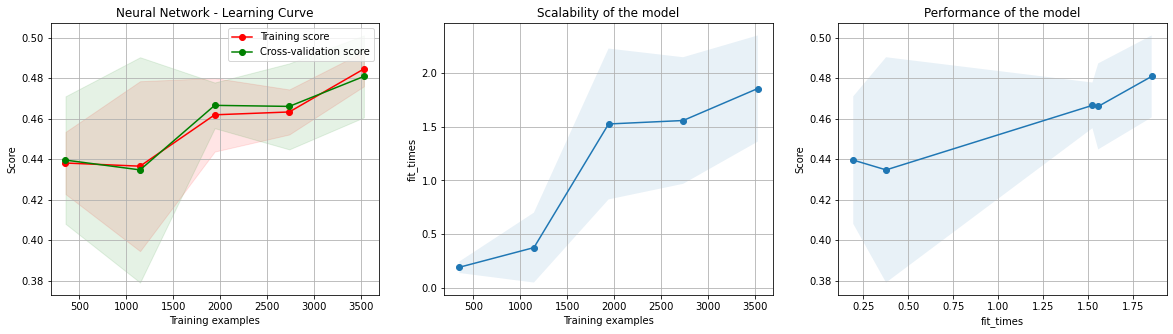

In [68]:
nn_clf = MLPClassifier(
    hidden_layer_sizes=(10,10),
    activation='relu',
    alpha=0.038,
    momentum=0.85,
    solver='sgd',
    max_iter=300,
    random_state=0
)

plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

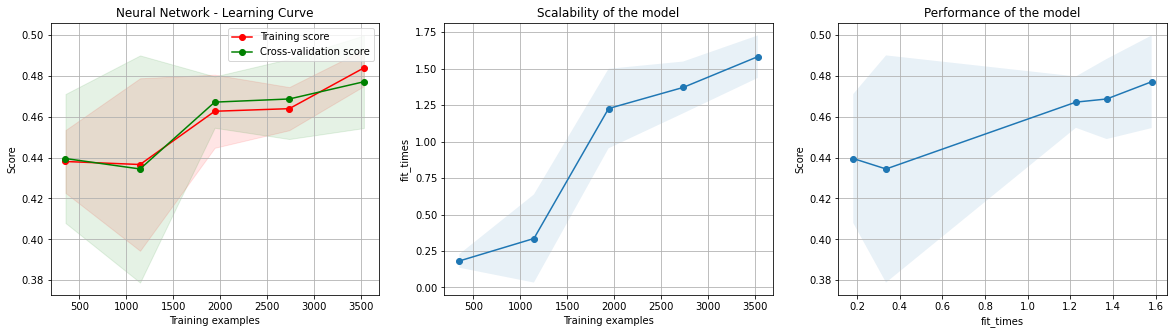

In [70]:
nn_clf = MLPClassifier(
    hidden_layer_sizes=(10,10),
    activation='relu',
    alpha=0.032,
    momentum=0.85,
    solver='sgd',
    max_iter=300,
    random_state=0
)

plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

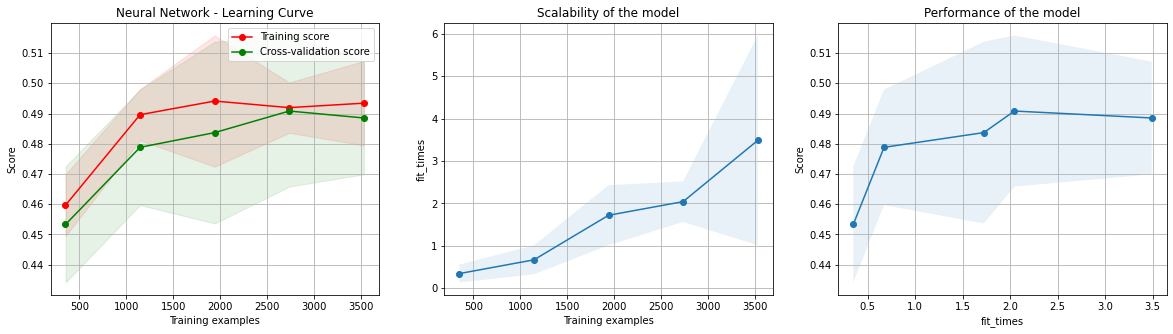

In [98]:
nn_clf = MLPClassifier(
    hidden_layer_sizes=(25, 25),
    activation='relu', 
    solver='sgd',
    max_iter=600,
    random_state=0
)
plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

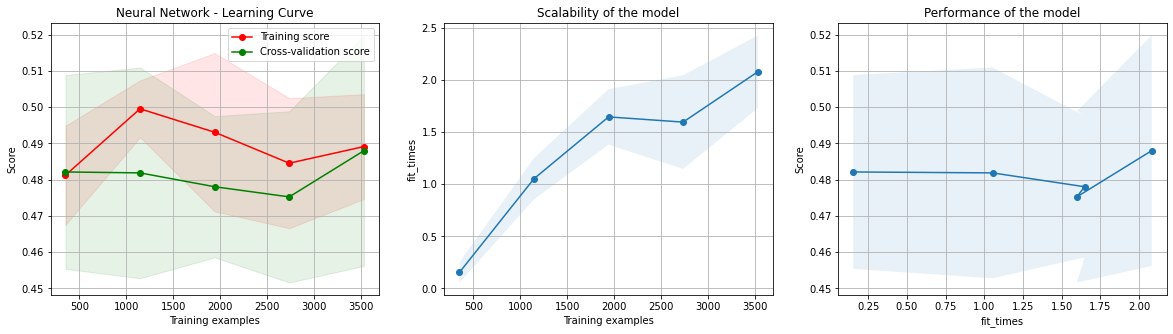

In [99]:
nn_clf = MLPClassifier(
    hidden_layer_sizes=(50, 50),
    activation='relu', 
    solver='sgd',
    max_iter=600,
    random_state=0
)
plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

# Boosting
- implement boosted version of the decision trees
- use some form of pruning

In [344]:
from sklearn.ensemble import AdaBoostClassifier

### Coarse Grid Search
- Boosting with more aggressive pruning

In [142]:

param_grid = [
    {
        'n_estimators': [2, 3, 4, 5, 10, 15],
    }
]

dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.008, max_depth=4)

ada_clf = AdaBoostClassifier(dt_clf, random_state=0)

grid_search = GridSearchCV(ada_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_


{'n_estimators': 5}

### Learning Curve Analysis

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

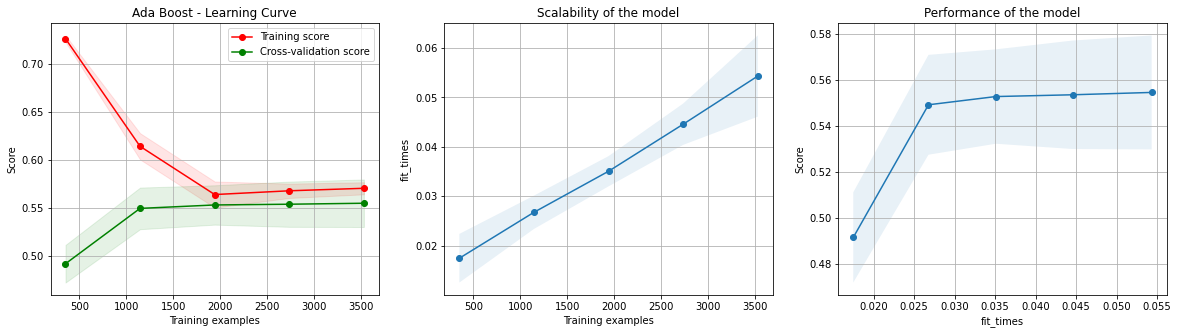

In [146]:
dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.008, max_depth=4)
ada_clf = AdaBoostClassifier(dt_clf, n_estimators=5, random_state=0)

plot_learning_curve(
    estimator=ada_clf, 
    title="Ada Boost - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

- High Bias Models (Underfitting)
- low training and cross-validation accuracy
- validation accuracy is far from the desired accuracy

How to fix
- Add more features
- Decrease the degree of regularization

### Model Complexity Analysis


- to decrease regularization, we can give more max_depth & reduce ccp_alpha

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

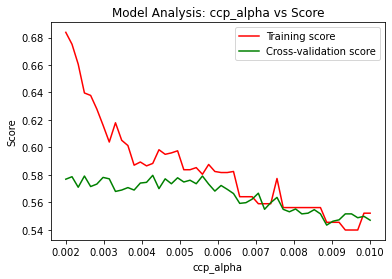

In [147]:
base_dt_param_range = np.linspace(0.002, 0.01, 50)

dt_params = {
    'random_state': 0,
    'max_depth': 10
}

ada_params = {
    'n_estimators': 5,
    'random_state': 0
}

plot_model_curve_boost_base(
    title="Model Analysis: ccp_alpha vs Score",
    X=x_train,
    y=y_train,
    base_dt_param_name="ccp_alpha",
    base_dt_param_range=base_dt_param_range,
    dt_params=dt_params,
    ada_params=ada_params,
    cv=10
)

- pick ccp_alpha 0.0034

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

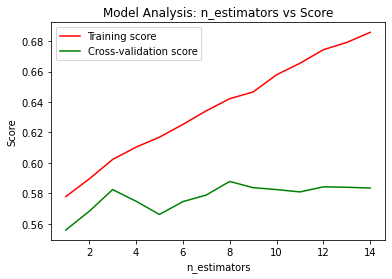

In [151]:
param_range = np.arange(1, 15, 1)

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=10, ccp_alpha=0.0034)
ada_clf = AdaBoostClassifier(dt_clf, random_state=0)

plot_model_curve(
    estimator=ada_clf,
    title="Model Analysis: n_estimators vs Score",
    X=x_train,
    y=y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=10
)

- pick n_estimators 3

## Final AdaBoost Model (with Decision tree base model)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

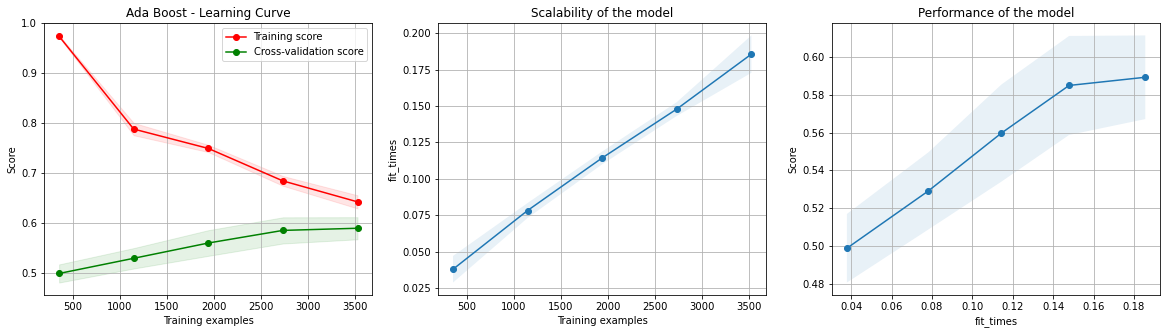

In [154]:
# dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0035, max_depth=5)
# ada_clf = AdaBoostClassifier(dt_clf, n_estimators=20, random_state=0)

dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0034, max_depth=10)
ada_clf = AdaBoostClassifier(dt_clf, n_estimators=8, random_state=0)

plot_learning_curve(
    estimator=ada_clf, 
    title="Ada Boost - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

### Test Accuracy

In [345]:
final_dt_boost_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0034, max_depth=10)
final_ada_boost_clf = AdaBoostClassifier(final_dt_boost_clf, n_estimators=8, random_state=0)
final_ada_boost_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0034,
                                                         max_depth=10,
                                                         random_state=0),
                   n_estimators=8, random_state=0)

In [346]:
dt_y_preds = final_ada_boost_clf.predict(x_test)

In [348]:
accuracy_score(y_test, dt_y_preds)

0.5857142857142857

# Support Vector Machines
- should be able to swap out kernel functions
- use at lease two

In [349]:
from sklearn.svm import SVC

## Coarse Grid Search

#### 1) RBF Kernel

In [189]:
# rbf kernel

param_grid = [
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 0.5, 1],
        'gamma': [0.01, 0.1, 0.5]
    }
]

svc_clf = SVC(random_state=0)

grid_search = GridSearchCV(svc_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

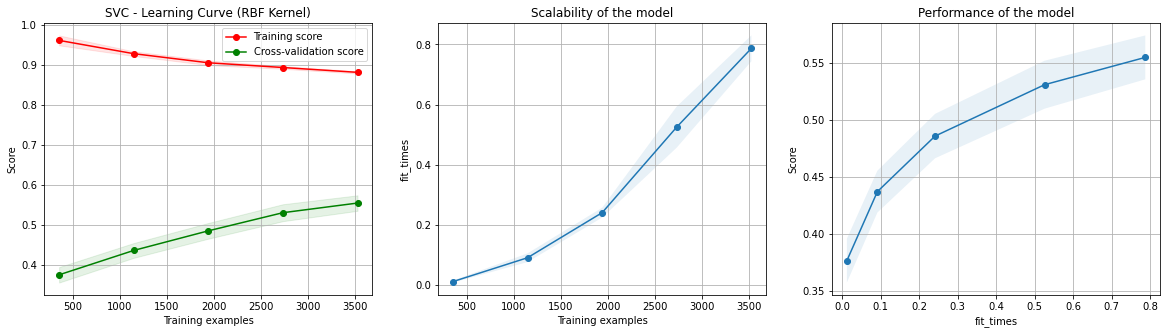

In [190]:
svc_clf = SVC(C=1, gamma=0.5, kernel='rbf', random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (RBF Kernel)", 
    X=x_train, 
    y=y_train,
    cv=10
)

In [191]:
# svc_clf = SVC(C=1.5, gamma=0.1, kernel='rbf', random_state=0)

# plot_learning_curve(
#     estimator=svc_clf, 
#     title="SVC - Learning Curve (RBF Kernel)", 
#     X=x_train, 
#     y=y_train,
#     cv=10
# )

- overfitting model
- High varience

## Learning curve analysis

In [192]:
# param_range = np.linspace(0, 0.5, 20)


# svc_clf = SVC(C=1.5, kernel='rbf', random_state=0)

# plot_model_curve(
#     estimator=svc_clf,
#     title="Model Analysis (svm with rbf kernel): gamma vs Score",
#     X=x_train,
#     y=y_train,
#     param_name="gamma",
#     param_range=param_range,
#     cv=10
# )

In [193]:
# param_range = np.linspace(0, 0.5, 20)


# svc_clf = SVC(C=1.0, kernel='rbf', random_state=0)

# plot_model_curve(
#     estimator=svc_clf,
#     title="Model Analysis (svm with rbf kernel): gamma vs Score",
#     X=x_train,
#     y=y_train,
#     param_name="gamma",
#     param_range=param_range,
#     cv=10
# )

[1.00000000e-03 1.62377674e-03 2.63665090e-03 4.28133240e-03
 6.95192796e-03 1.12883789e-02 1.83298071e-02 2.97635144e-02
 4.83293024e-02 7.84759970e-02 1.27427499e-01 2.06913808e-01
 3.35981829e-01 5.45559478e-01 8.85866790e-01 1.43844989e+00
 2.33572147e+00 3.79269019e+00 6.15848211e+00 1.00000000e+01]


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

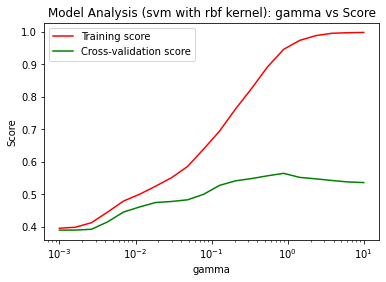

In [194]:
param_range = np.logspace(-3, 1, 20)
print(param_range)

svc_clf = SVC(C=1, kernel='rbf', random_state=0)

plot_model_curve(
    estimator=svc_clf,
    title="Model Analysis (svm with rbf kernel): gamma vs Score",
    X=x_train,
    y=y_train,
    param_name="gamma",
    param_range=param_range,
    cv=10,
    x_scale_is_log=True
)

- pick gamma=0.03
- gives good balance between curves
- even though after 0.9 validation decrease. That point is still overfitting

In [195]:
# param_range = np.linspace(0, 2, 20)


# svc_clf = SVC(gamma=0.03, kernel='rbf', random_state=0)

# plot_model_curve(
#     estimator=svc_clf,
#     title="Model Analysis (svm with rbf kernel): C vs Score",
#     X=x_train,
#     y=y_train,
#     param_name="C",
#     param_range=param_range,
#     cv=10
# )

[ 0.01        0.0143845   0.02069138  0.02976351  0.04281332  0.06158482
  0.08858668  0.1274275   0.18329807  0.26366509  0.37926902  0.54555948
  0.78475997  1.12883789  1.62377674  2.33572147  3.35981829  4.83293024
  6.95192796 10.        ]


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

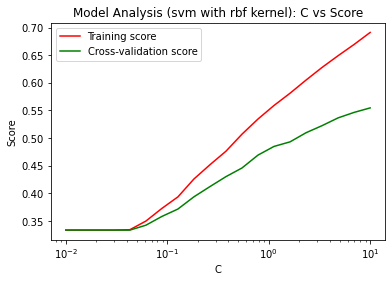

In [197]:
param_range = np.logspace(-2, 1, 20)
print(param_range)


svc_clf = SVC(gamma=0.03, kernel='rbf', random_state=0)


plot_model_curve(
    estimator=svc_clf,
    title="Model Analysis (svm with rbf kernel): C vs Score",
    X=x_train,
    y=y_train,
    param_name="C",
    param_range=param_range,
    cv=10,
    x_scale_is_log=True
)

In [198]:
# param_range = np.linspace(0, 2, 20)


# svc_clf = SVC(gamma=0.02, kernel='rbf', random_state=0)

# plot_model_curve(
#     estimator=svc_clf,
#     title="Model Analysis (svm with rbf kernel): C vs Score",
#     X=x_train,
#     y=y_train,
#     param_name="C",
#     param_range=param_range,
#     cv=10
# )

In [199]:
# svc_clf = SVC(C=1.75, gamma=0.03, kernel='rbf', random_state=0)

# plot_learning_curve(
#     estimator=svc_clf, 
#     title="SVC - Learning Curve (Kernel=rbf)", 
#     X=x_train, 
#     y=y_train,
#     cv=10
# )

In [200]:
# svc_clf = SVC(C=1.55, gamma=0.03, kernel='rbf', random_state=0)

# plot_learning_curve(
#     estimator=svc_clf, 
#     title="SVC - Learning Curve (Kernel=rbf)", 
#     X=x_train, 
#     y=y_train,
#     cv=10
# )

In [201]:
# svc_clf = SVC(C=1.5, gamma=0.015, kernel='rbf', random_state=0)

# plot_learning_curve(
#     estimator=svc_clf, 
#     title="SVC - Learning Curve (Kernel=rbf)", 
#     X=x_train, 
#     y=y_train,
#     cv=10
# )

In [202]:
# svc_clf = SVC(C=0.5, gamma=0.02, kernel='rbf', random_state=0)

# plot_learning_curve(
#     estimator=svc_clf, 
#     title="SVC - Learning Curve (Kernel=rbf)", 
#     X=x_train, 
#     y=y_train,
#     cv=10
# )

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

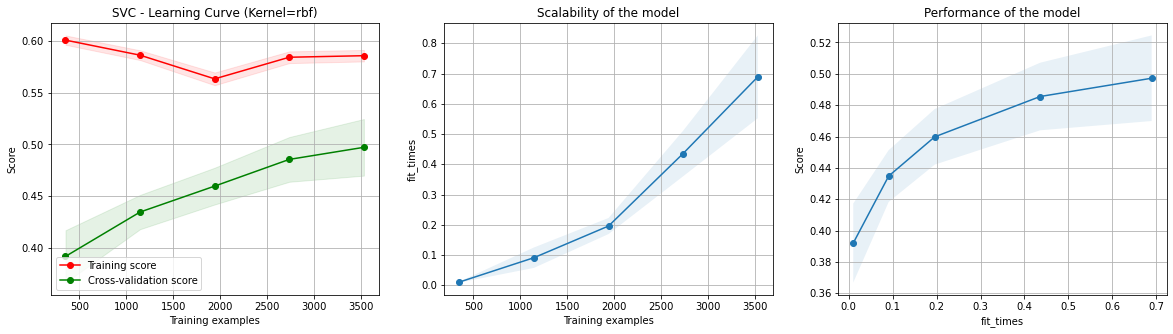

In [206]:
# svc_clf = SVC(C=1.5, gamma=0.011288, kernel='rbf', random_state=0)
# svc_clf = SVC(C=3.359, gamma=0.0183, kernel='rbf', random_state=0)
# svc_clf = SVC(C=2, gamma=0.5, kernel='rbf', random_state=0)

svc_clf = SVC(C=1.75, gamma=0.03, kernel='rbf', random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (Kernel=rbf)", 
    X=x_train, 
    y=y_train,
    cv=10
)

### Test Accuracy

In [350]:
final_svc_clf = SVC(C=1.75, gamma=0.03, kernel='rbf', random_state=0)
final_svc_clf.fit(x_train, y_train)

SVC(C=1.75, gamma=0.03, random_state=0)

In [351]:
dt_y_preds = final_svc_clf.predict(x_test)

In [352]:
accuracy_score(y_test, dt_y_preds)

0.5204081632653061

#### 2) Sigmoid Kernel

In [60]:
# sigmoid kernel

param_grid = [
    {
        'kernel': ['sigmoid'],
        'C': [0.05, 0.1, 0.5],
        'gamma': [0.05, 0.1]
    }
]

svc_clf = SVC(random_state=0)

grid_search = GridSearchCV(svc_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'C': 0.05, 'gamma': 0.05, 'kernel': 'sigmoid'}

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

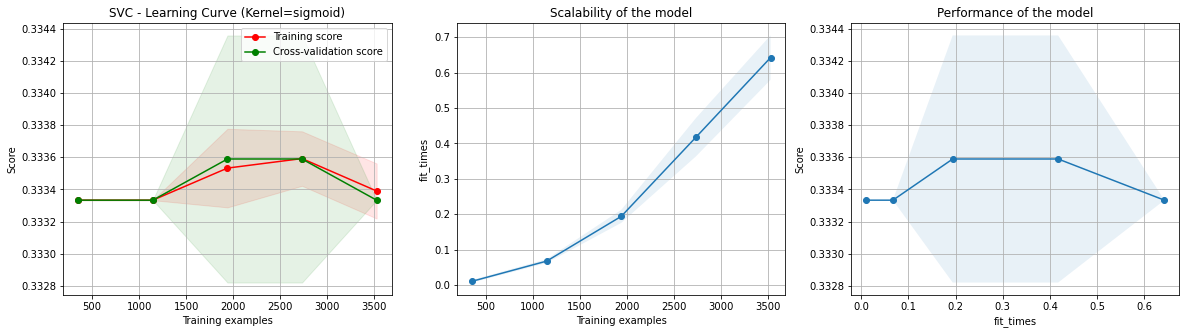

In [222]:
svc_clf = SVC(C=0.05, gamma=0.001, kernel='sigmoid', random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (Kernel=sigmoid)", 
    X=x_train, 
    y=y_train,
    cv=10
)

### Test Accuracy

In [353]:
final_svc_clf_sigmoid = SVC(C=0.05, gamma=0.001, kernel='sigmoid', random_state=0)
final_svc_clf_sigmoid.fit(x_train, y_train)

dt_y_preds = final_svc_clf_sigmoid.predict(x_test)
accuracy_score(y_test, dt_y_preds)

0.44081632653061226

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

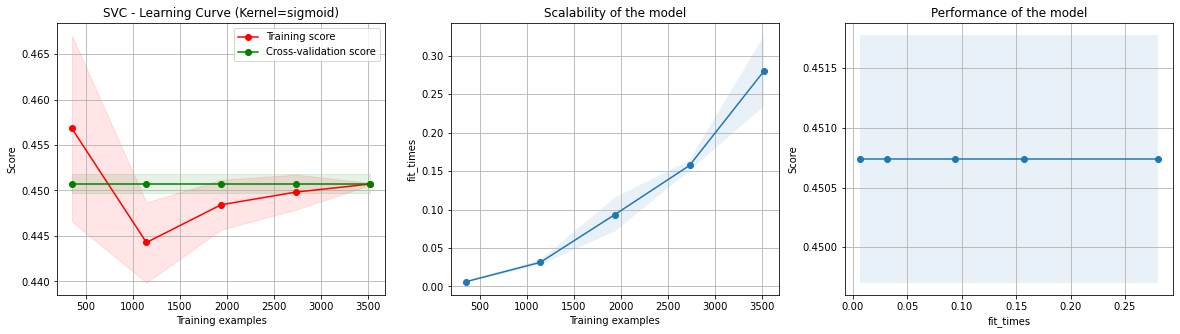

In [61]:
svc_clf = SVC(C=0.05, gamma=0.05, kernel='sigmoid', random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (Kernel=sigmoid)", 
    X=x_train, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

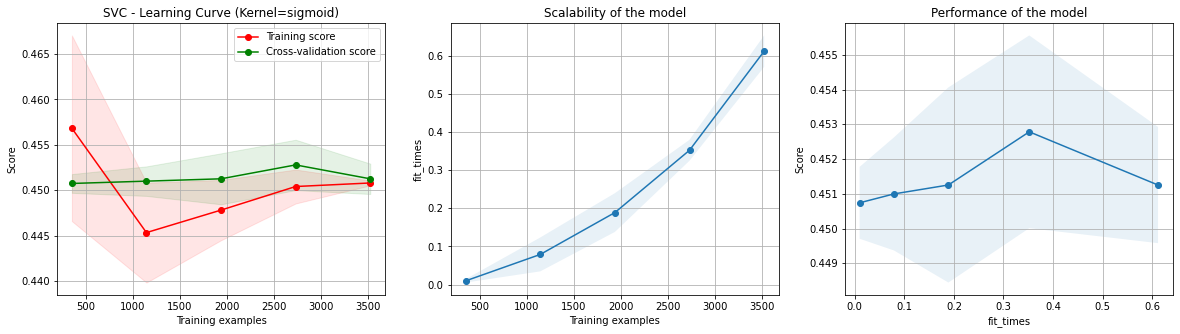

In [64]:
svc_clf = SVC(C=1, gamma=0.001, kernel='sigmoid', random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (Kernel=sigmoid)", 
    X=x_train, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

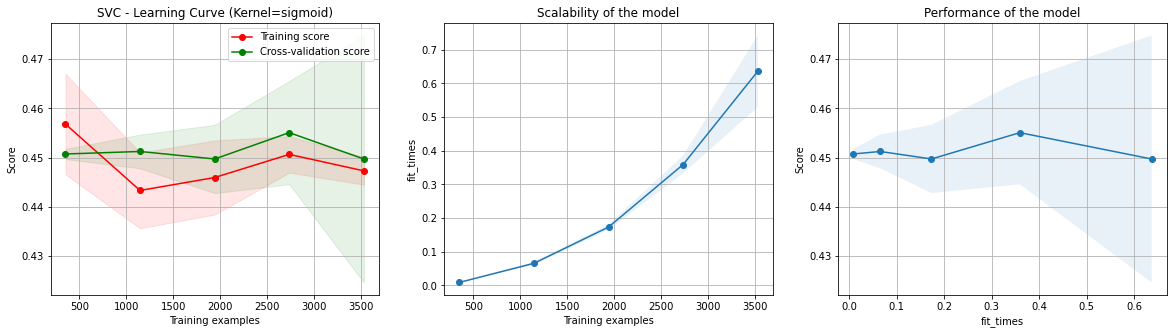

In [37]:
svc_clf = SVC(C=5, gamma=0.001, coef0=0.01, kernel='sigmoid', random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (Kernel=sigmoid)", 
    X=x_train, 
    y=y_train,
    cv=10
)

#### 3) Poly Kernel

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

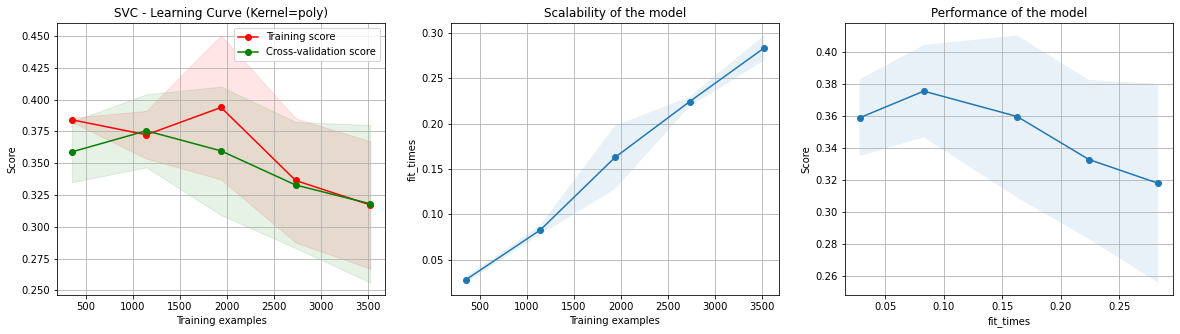

In [57]:
svc_clf = SVC(kernel='poly', C=1.5, degree=2, gamma=0.01, max_iter=5000, random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (Kernel=poly)", 
    X=x_train, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

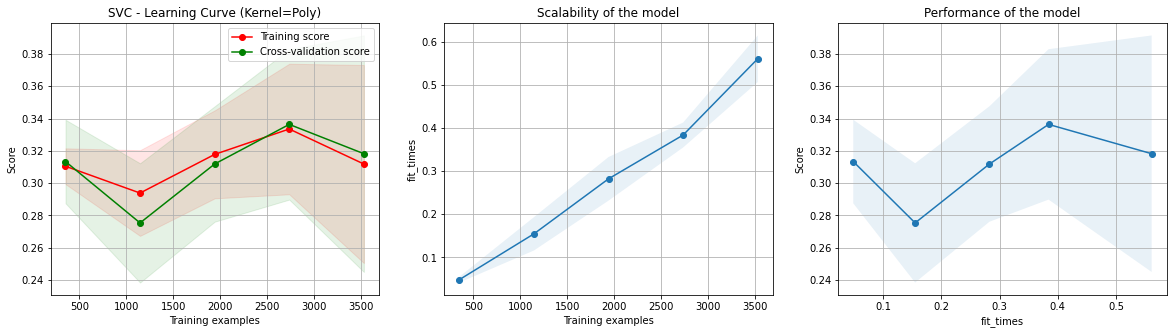

In [67]:
svc_clf = SVC(kernel='poly', C=1.5, degree=4, gamma=0.01, max_iter=10000, random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (Kernel=Poly)", 
    X=x_train, 
    y=y_train,
    cv=10
)

- This is a High bias model
- Model is too simple
- decrese regularization or use a complex model (Use rbf)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

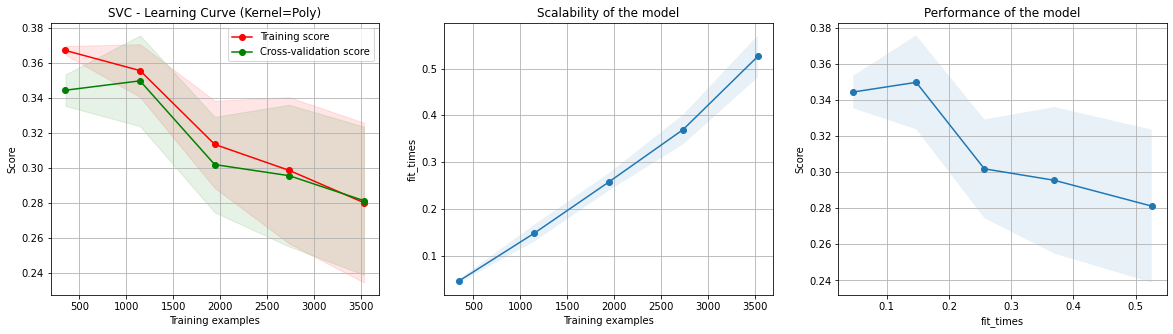

In [66]:
svc_clf = SVC(kernel='poly', C=2, degree=5, gamma=0.1, max_iter=10000, random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (Kernel=Poly)", 
    X=x_train, 
    y=y_train,
    cv=10
)

# K-Nearest Neighbors
- Use different values of k

In [224]:
from sklearn.neighbors import KNeighborsClassifier

### Coarse Grid Search

In [278]:
# param_grid = [
#     {
#         'n_neighbors': [1, 2, 3, 4, 5, 6, 10, 15, 20],
#         'weights': ['uniform']
#     }
# ]

# knn_clf = KNeighborsClassifier()

# grid_search = GridSearchCV(knn_clf, param_grid, cv=10, return_train_score=True)

# grid_search.fit(x_train, y_train)

# grid_search.best_params_

In [277]:
param_grid = [
    {
        'n_neighbors': [5, 10, 15, 20, 25],
        'leaf_size': [5, 10, 15, 20, 25],
        'p': [1, 2]
    }
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train_mm, y_train)

grid_search.best_params_

{'leaf_size': 5, 'n_neighbors': 5, 'p': 1}

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

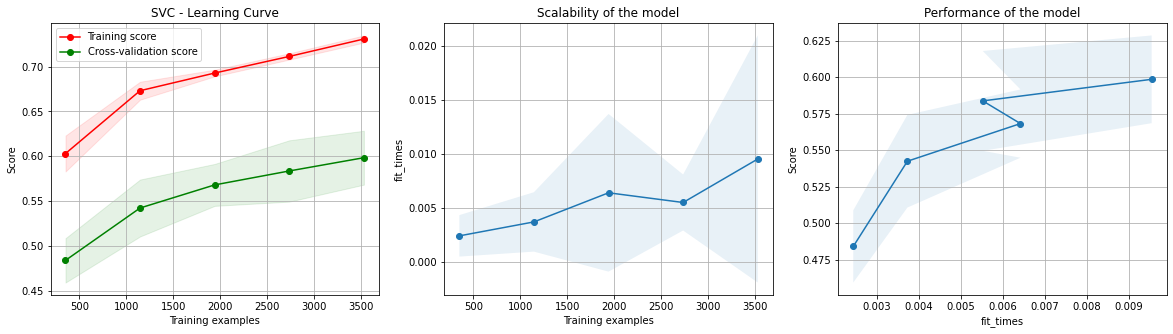

In [279]:
knn_clf = KNeighborsClassifier(n_neighbors=5, leaf_size=5, p=1, weights='uniform')

plot_learning_curve(
    estimator=knn_clf, 
    title="SVC - Learning Curve", 
    X=x_train_mm, 
    y=y_train,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

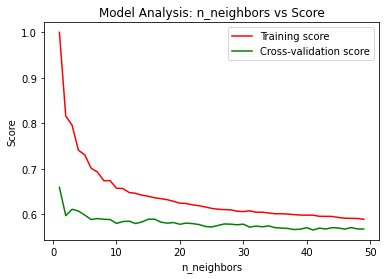

In [280]:
param_range = np.arange(1, 50, 1)

knn_clf = KNeighborsClassifier(leaf_size=5, p=1, weights='uniform')

plot_model_curve(
    estimator=knn_clf,
    title="Model Analysis: n_neighbors vs Score",
    X=x_train_mm,
    y=y_train,
    param_name="n_neighbors",
    param_range=param_range,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

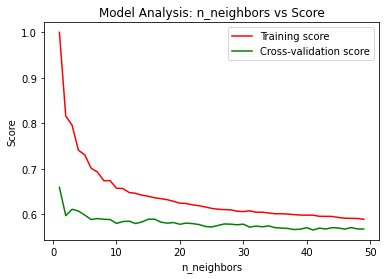

In [367]:
param_range = np.arange(1, 50, 1)

knn_clf = KNeighborsClassifier(p=1, weights='uniform')

plot_model_curve(
    estimator=knn_clf,
    title="Model Analysis: n_neighbors vs Score",
    X=x_train_mm,
    y=y_train,
    param_name="n_neighbors",
    param_range=param_range,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

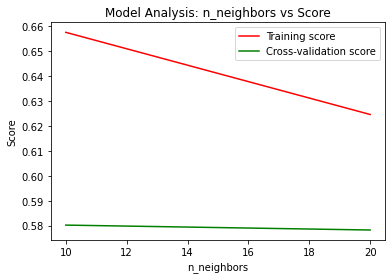

In [368]:
param_range = [0, 10, 20]

knn_clf = KNeighborsClassifier(p=1, weights='uniform')

plot_model_curve(
    estimator=knn_clf,
    title="Model Analysis: n_neighbors vs Score",
    X=x_train_mm,
    y=y_train,
    param_name="n_neighbors",
    param_range=param_range,
    cv=10
)

In [281]:
# param_range = np.arange(1, 30, 1)

# knn_clf = KNeighborsClassifier(leaf_size=5, p=1, weights='uniform')

# plot_model_curve(
#     estimator=knn_clf,
#     title="Model Analysis: n_neighbors vs Score",
#     X=x_train,
#     y=y_train,
#     param_name="n_neighbors",
#     param_range=param_range,
#     cv=10
# )

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

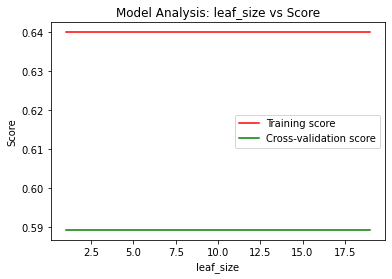

In [282]:
param_range = np.arange(1, 20, 1)

knn_clf = KNeighborsClassifier(n_neighbors=15, p=1, weights='uniform')

plot_model_curve(
    estimator=knn_clf,
    title="Model Analysis: leaf_size vs Score",
    X=x_train_mm,
    y=y_train,
    param_name="leaf_size",
    param_range=param_range,
    cv=10
)

- No effect from leaf_size. So set to leaf_size=1

### weights=uniform, algorithm=ball_tree

In [299]:
# param_range = np.arange(1, 31, 2)

# knn_clf = KNeighborsClassifier(weights='uniform', algorithm='ball_tree')

# plot_model_curve(
#     estimator=knn_clf,
#     title="Model Analysis (KNN algorithm=ball_tree): n_neighbors vs Score",
#     X=x_train,
#     y=y_train,
#     param_name="n_neighbors",
#     param_range=param_range,
#     cv=10
# )

### weights=uniform, algorithm=brute

In [298]:
# param_range = np.arange(1, 31, 2)

# knn_clf = KNeighborsClassifier(weights='uniform', algorithm='brute')

# plot_model_curve(
#     estimator=knn_clf,
#     title="Model Analysis (KNN algorithm=brute): n_neighbors vs Score",
#     X=x_train,
#     y=y_train,
#     param_name="n_neighbors",
#     param_range=param_range,
#     cv=10
# )

### Final KNN model

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

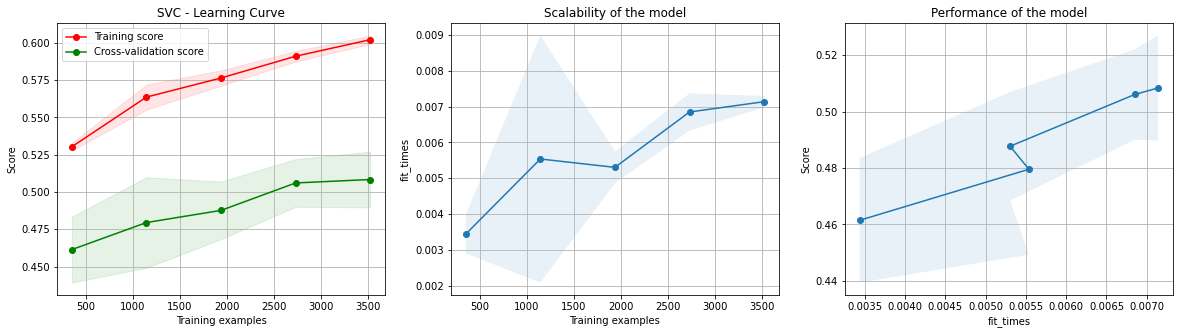

In [130]:
# knn_clf = KNeighborsClassifier(n_neighbors=15, leaf_size=1, p=1, weights='uniform')

# plot_learning_curve(
#     estimator=knn_clf, 
#     title="SVC - Learning Curve", 
#     X=x_train, 
#     y=y_train,
#     cv=10
# )

In [287]:
# knn_clf = KNeighborsClassifier(n_neighbors=60, p=1)

# plot_learning_curve(
#     estimator=knn_clf, 
#     title="SVC - Learning Curve", 
#     X=x_train, 
#     y=y_train,
#     cv=10
# )

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

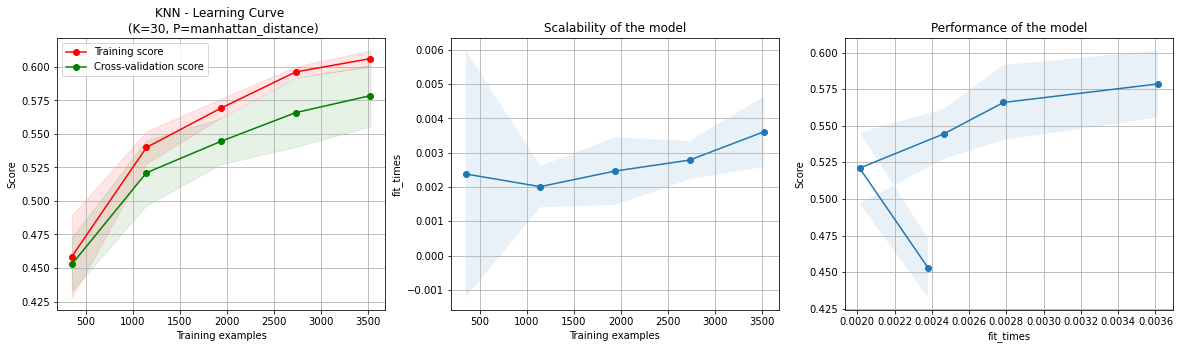

In [296]:
knn_clf = KNeighborsClassifier(n_neighbors=30, p=1)

plot_learning_curve(
    estimator=knn_clf, 
    title="KNN - Learning Curve \n (K=30, P=manhattan_distance)", 
    X=x_train_mm, 
    y=y_train,
    cv=10
)

### Test Accuracy

In [357]:
final_knn_clf = KNeighborsClassifier(n_neighbors=30, p=1)
final_knn_clf.fit(x_train_mm, y_train)
dt_y_preds = final_knn_clf.predict(x_test_mm)
accuracy_score(y_test, dt_y_preds)

0.5489795918367347

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

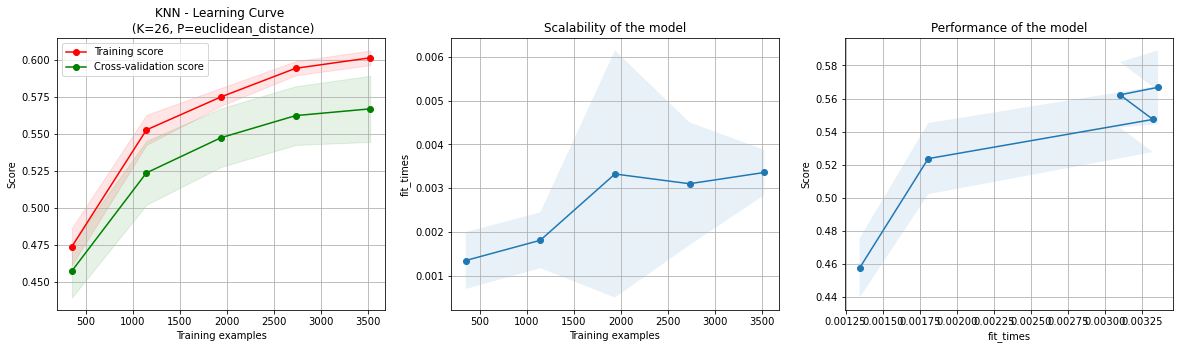

In [297]:
knn_clf = KNeighborsClassifier(n_neighbors=26, p=2)

plot_learning_curve(
    estimator=knn_clf, 
    title="KNN - Learning Curve \n (K=26, P=euclidean_distance)", 
    X=x_train_mm, 
    y=y_train,
    cv=10
)

### Test Accuracy

In [358]:
final_knn_clf = KNeighborsClassifier(n_neighbors=26, p=2)
final_knn_clf.fit(x_train_mm, y_train)
dt_y_preds = final_knn_clf.predict(x_test_mm)
accuracy_score(y_test, dt_y_preds)

0.5479591836734694

In [288]:
# knn_clf = KNeighborsClassifier(n_neighbors=60, p=1)

# plot_learning_curve(
#     estimator=knn_clf, 
#     title="SVC - Learning Curve", 
#     X=x_train_mm, 
#     y=y_train,
#     cv=10
# )